#### Objective
- Load inbuilt text data from the nltk library
- Count the number of words in the text
- Perform exploratory data analysis (data preprocessing, initial plots)


In [40]:
# Import the e-books available in the nltk corpus. As you can see I'm importing gutenberg. Now typing `gutenberg` can be cumbersome
# So I will use the `as` keyword for a simpler identifier.

import nltk
from nltk.corpus import gutenberg as corpus
# Each e-book is identified by a fileid as shown next.
corpus.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Now, lets pick up any text novel and continue with our experiments. My personal favorite is Macbeth by William Shakespeare.
Here, the raw() function will print the full text. 
Later, we will wrap the result of raw() to find total characters, words and sentences in the text.

In [13]:
# Show the text
corpus.raw('shakespeare-macbeth.txt')

"[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus. Scoena Prima.\n\nThunder and Lightning. Enter three Witches.\n\n  1. When shall we three meet againe?\nIn Thunder, Lightning, or in Raine?\n  2. When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3. That will be ere the set of Sunne\n\n   1. Where the place?\n  2. Vpon the Heath\n\n   3. There to meet with Macbeth\n\n   1. I come, Gray-Malkin\n\n   All. Padock calls anon: faire is foule, and foule is faire,\nHouer through the fogge and filthie ayre.\n\nExeunt.\n\n\nScena Secunda.\n\nAlarum within. Enter King Malcome, Donalbaine, Lenox, with\nattendants,\nmeeting a bleeding Captaine.\n\n  King. What bloody man is that? he can report,\nAs seemeth by his plight, of the Reuolt\nThe newest state\n\n   Mal. This is the Serieant,\nWho like a good and hardie Souldier fought\n'Gainst my Captiuitie: Haile braue friend;\nSay to the King, the knowledge of the Broyle,\nAs thou didst leaue it\n\n   Cap. 

In [33]:
# Save the text in an object
macbeth = corpus.words('shakespeare-macbeth.txt')
# Check the object data type
type(macbeth)
# Standardise the text data 
macbeth_lower = set(w.lower() for w in macbeth)

How many characters, words and sentences in the text?

In [15]:
macbeth_chars = len ( corpus.raw('shakespeare-macbeth.txt') )
macbeth_words = len ( corpus.words('shakespeare-macbeth.txt') )
macbeth_sents = len ( corpus.raw('shakespeare-macbeth.txt') )

In [16]:
print ("\n Total characters are: ", macbeth_chars)
print ("\n Total words are: ", macbeth_words)
print ("\n Total sentences are: ", macbeth_sents)


 Total characters are:  100351

 Total words are:  23140

 Total sentences are:  100351


Let us explore now some basic statistics with textual data. We will discuss the question of what makes a text distinct, and use automatic
methods to find characteristic words and expressions of a text. 

We will first begin with `Frequency Distributions`. Here the research question is, "How can we automatically identify the words of a text that are most informative about the topic and genre of the text?"
One method would be to keep a tally for each vocabulary item, but, then it can be tiring process if the text data size is huge. So let us ask the machine to do the hard work :-)


In [35]:
from nltk import FreqDist
fd1 = FreqDist(macbeth_lower)
print (fd1)

<FreqDist with 3464 samples and 3464 outcomes>


Now let us find out the unique words. We can do this using the `keys()` function

In [36]:
vocab = fd1.keys()
vocab

dict_keys(['told', 'surgeons', 'affaires', 'greaze', 'tarrying', 'missing', 'very', 'eye', 'bat', 'sightlesse', 'esteem', 'madame', 'grandam', 'vnusuall', 'sicke', 'faile', 'furious', 'safest', 'tigers', 'crying', 'concerne', 'especially', 'steales', 'foggy', 'tragedie', 'amend', 'trifles', 'insane', 'dying', 'touch', 'taking', 'torch', 'wolues', 'buttrice', 'heat', 'back', 'wear', 'whay', 'backward', 'greatnesse', 'thine', 'stage', 'mummey', 'prophecying', 'bellona', 'pray', 'youl', 'amends', 'respect', 'rugs', 'buy', 'interest', 'whore', 'smother', 'fly', 'wofull', 'cause', 'spy', 'one', 'gaue', 'knockes', 'legions', 'glimmers', 'loue', 'diminitiue', 'ghosts', 'nourisher', 'plac', 'harrold', 'prou', 'purpose', 'remedie', 'pester', 'heire', 'knowledge', 'filthie', 'ronyon', 'euents', 'forraine', 'holds', 'sinfull', 'tale', 'practise', 'vertue', 'seauenth', 'cosins', 'tree', 'peepe', 'push', 'powers', 'conclusion', 'toe', 'sleepers', 'shakes', 'smiling', 'sleeping', 'iustice', 'snow', 

The expression keys() gives us a list of all the distinct types in the text. 

As we can see the above text still contains several useless words like `is`, `the`, `it` etc. These are known as `stopwords`. We will see next on how to remove them.

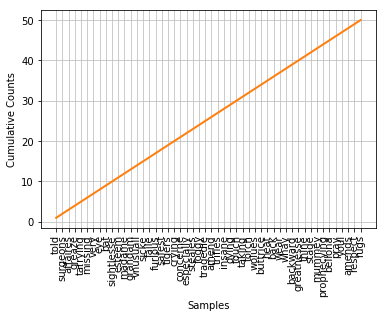

In [37]:
# plot a basic distribution
fd1.plot(50, cumulative=True)

In [38]:
# Remove stopwords

# import the stopwords library
from nltk.corpus import stopwords
# convert text data to lower

# save in a new object
filtered_words = [word for word in macbeth_lower if word not in stopwords.words('english')]
# show the first 10 words 
filtered_words[:10]

['told',
 'surgeons',
 'affaires',
 'greaze',
 'tarrying',
 'missing',
 'eye',
 'bat',
 'sightlesse',
 'esteem']

Reference: See this SO thread (https://stackoverflow.com/questions/19130512/stopword-removal-with-nltk)

Stemming

In [44]:
# import the Porter stemmer and save to an object
porter = nltk.PorterStemmer()
#text = IndexedText(porter, macbeth_lower)
#text
#text.concordance('missing')
macbeth_lower_stem=[porter.stem(t) for t in macbeth_lower]
macbeth_lower_stem

['told',
 'surgeon',
 'affair',
 'greaz',
 'tarri',
 'miss',
 'veri',
 'eye',
 'bat',
 'sightless',
 'esteem',
 'madam',
 'grandam',
 'vnusual',
 'sick',
 'fail',
 'furiou',
 'safest',
 'tiger',
 'cri',
 'concern',
 'especi',
 'steal',
 'foggi',
 'tragedi',
 'amend',
 'trifl',
 'insan',
 'die',
 'touch',
 'take',
 'torch',
 'wolu',
 'buttric',
 'heat',
 'back',
 'wear',
 'whay',
 'backward',
 'greatness',
 'thine',
 'stage',
 'mummey',
 'propheci',
 'bellona',
 'pray',
 'youl',
 'amend',
 'respect',
 'rug',
 'buy',
 'interest',
 'whore',
 'smother',
 'fli',
 'woful',
 'caus',
 'spi',
 'one',
 'gaue',
 'knock',
 'legion',
 'glimmer',
 'loue',
 'diminitiu',
 'ghost',
 'nourish',
 'plac',
 'harrold',
 'prou',
 'purpos',
 'remedi',
 'pester',
 'heir',
 'knowledg',
 'filthi',
 'ronyon',
 'euent',
 'forrain',
 'hold',
 'sinful',
 'tale',
 'practis',
 'vertu',
 'seauenth',
 'cosin',
 'tree',
 'peep',
 'push',
 'power',
 'conclus',
 'toe',
 'sleeper',
 'shake',
 'smile',
 'sleep',
 'iustic',
 

Lemmatization

The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords).

In [45]:
wnl = nltk.WordNetLemmatizer()
macbeth_lower_lemma=[wnl.lemmatize(t) for t in macbeth_lower]
macbeth_lower_lemma

['told',
 'surgeon',
 'affaire',
 'greaze',
 'tarrying',
 'missing',
 'very',
 'eye',
 'bat',
 'sightlesse',
 'esteem',
 'madame',
 'grandam',
 'vnusuall',
 'sicke',
 'faile',
 'furious',
 'safest',
 'tiger',
 'cry',
 'concerne',
 'especially',
 'steales',
 'foggy',
 'tragedie',
 'amend',
 'trifle',
 'insane',
 'dying',
 'touch',
 'taking',
 'torch',
 'wolues',
 'buttrice',
 'heat',
 'back',
 'wear',
 'whay',
 'backward',
 'greatnesse',
 'thine',
 'stage',
 'mummey',
 'prophecying',
 'bellona',
 'pray',
 'youl',
 'amends',
 'respect',
 'rug',
 'buy',
 'interest',
 'whore',
 'smother',
 'fly',
 'wofull',
 'cause',
 'spy',
 'one',
 'gaue',
 'knockes',
 'legion',
 'glimmer',
 'loue',
 'diminitiue',
 'ghost',
 'nourisher',
 'plac',
 'harrold',
 'prou',
 'purpose',
 'remedie',
 'pester',
 'heire',
 'knowledge',
 'filthie',
 'ronyon',
 'euents',
 'forraine',
 'hold',
 'sinfull',
 'tale',
 'practise',
 'vertue',
 'seauenth',
 'cosins',
 'tree',
 'peepe',
 'push',
 'power',
 'conclusion',
 'to